In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [2]:
df_train = pd.read_csv("Dataset/kendaraan_train.csv")
df_train.drop(['id'], axis=1, inplace=True)

print("Total Dataset :", len(df_train))
df_train.sample(5)

Total Dataset : 285831


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
121076,Wanita,38.0,1.0,15.0,0.0,1-2 Tahun,Pernah,27363.0,124.0,156.0,1
84950,Wanita,22.0,1.0,13.0,1.0,< 1 Tahun,Tidak,2630.0,152.0,245.0,0
179542,NaN,NaN,1.0,15.0,0.0,< 1 Tahun,Pernah,27661.0,152.0,184.0,0
21802,Pria,27.0,1.0,11.0,NaN,< 1 Tahun,Tidak,35749.0,152.0,271.0,0
184974,Wanita,60.0,1.0,33.0,1.0,1-2 Tahun,Tidak,2630.0,124.0,224.0,0


In [3]:
df_train.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [4]:
df_train['Umur_Kendaraan'].value_counts()

1-2 Tahun    142761
< 1 Tahun    117378
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64

In [5]:
df_train['Kendaraan_Rusak'].value_counts()

Pernah    137123
Tidak     134520
Name: Kendaraan_Rusak, dtype: int64

In [6]:
df_train['SIM'].value_counts()

1.0    270843
0.0       584
Name: SIM, dtype: int64

In [7]:
df_train['Sudah_Asuransi'].value_counts()

0.0    146997
1.0    124605
Name: Sudah_Asuransi, dtype: int64

In [8]:
df_train.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
df_test = pd.read_csv("Dataset/kendaraan_test.csv")

print("Total Dataset :", len(df_test))
df_test.sample(5)

Total Dataset : 47639


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
35043,Pria,47,1,28,0,1-2 Tahun,Pernah,42346,124,210,0
36967,Pria,29,1,30,0,< 1 Tahun,Pernah,2630,154,89,0
28580,Pria,45,1,28,0,1-2 Tahun,Pernah,33128,26,209,1
17199,Pria,29,1,28,0,< 1 Tahun,Pernah,60770,26,289,1
27201,Pria,23,1,28,1,< 1 Tahun,Tidak,29988,152,199,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [11]:
df_train.isna().sum()


Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [12]:
df_test.isna().sum()


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

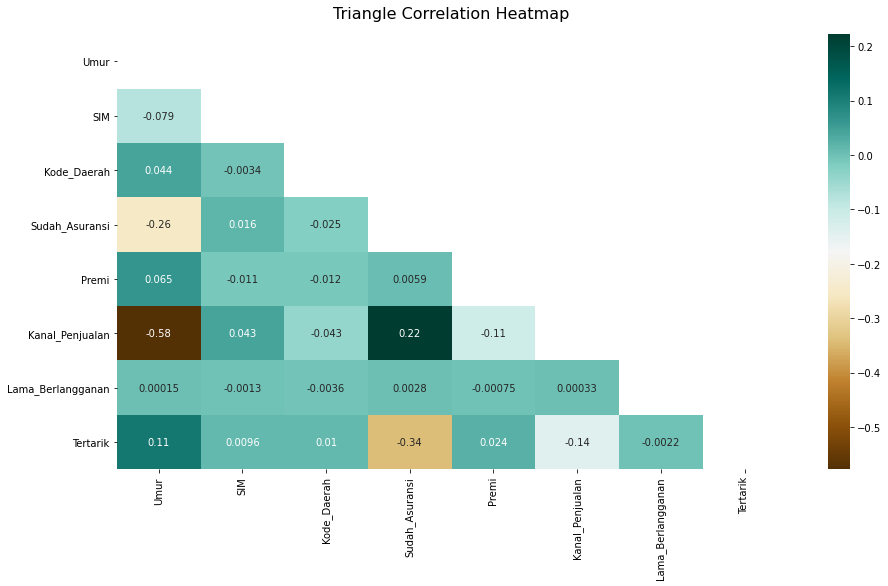

In [13]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap

plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

## **Menghapus Data Duplikasi**

In [14]:
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 169


In [15]:
df_train.drop_duplicates(inplace=True)

In [16]:
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


## **Label Encoding**


In [17]:
def label_encoding(df):
    df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Wanita', 'Pria'], [0, 1])
    df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1, 2])
    df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Tidak', 'Pernah'], [0, 1])

label_encoding(df_train)
label_encoding(df_test)

df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0


## **Mengisi Data Kosong**


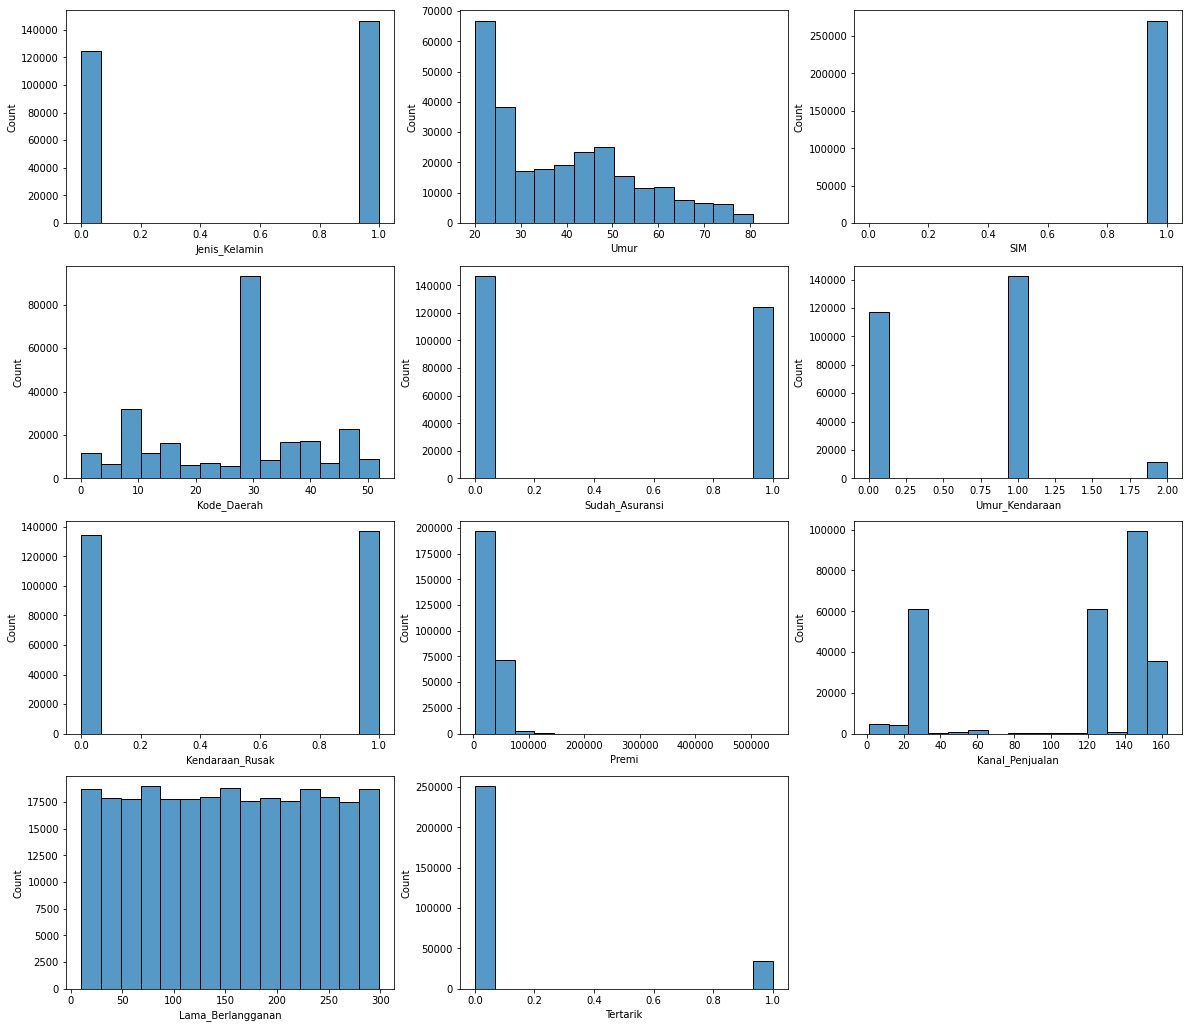

In [18]:
f = plt.figure(figsize=(20, 18))

for i, val in enumerate(list(df_train.columns)):
    f.add_subplot(4, 3, i+1)
    sns.histplot(df_train[val], bins=15)
   
plt.show()

In [19]:
# Pengisian Data Sesuai Pendistribusiannya
df_train['SIM'].fillna(float(df_train['SIM'].mode()), inplace=True)
df_train['Kode_Daerah'].fillna(float(df_train['Kode_Daerah'].mode()), inplace=True)
df_train['Kanal_Penjualan'].fillna(float(df_train['Kanal_Penjualan'].mode()), inplace=True)
df_train['Lama_Berlangganan'].fillna(float(df_train['Lama_Berlangganan'].mean()), inplace=True)

# Data Nominal Kategorikal Diisi Menggunakan Modus
for i in df_train.columns:
    df_train[i].fillna(float(df_train[i].median()), inplace=True)

df_train.isna().sum()


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [20]:
# Membuat Rumus Penghapusan Outlier Dengan Menentukan Batas Atas Dan Batas Bawahnya 
Q1 = df_train["Premi"].quantile(0.25)
Q3 = df_train["Premi"].quantile(0.75)
IQR = Q3 - Q1

BB = Q1 - (1.5 * IQR)
BA = Q3 + (1.5 * IQR)

print("Batas Atas : ", BA)
print("Batas Bawah : ", BB)

df_train = df_train[~((df_train["Premi"] < BB) | (df_train["Premi"] > BA))]

Batas Atas :  59721.625
Batas Bawah :  4066.625


Total Dataset : 230631


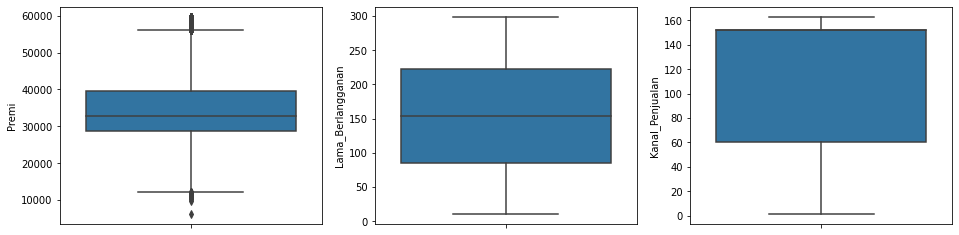

In [21]:
print("Total Dataset :", len(df_train))

fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
sns.boxplot(y='Premi', data=df_train, ax=ax[0])
sns.boxplot(y='Lama_Berlangganan', data=df_train, ax=ax[1])
sns.boxplot(y='Kanal_Penjualan', data=df_train, ax=ax[2])
plt.show()

## **Scaling Data**

In [22]:
numerical = ['Lama_Berlangganan', 'Umur', 'Kode_Daerah', 'Kanal_Penjualan', 'Premi']

scaler = MinMaxScaler()

df_train[numerical] = scaler.fit_transform(df_train[numerical].values)
df_train.sample(5)


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
153471,0.0,0.584615,1.0,0.538462,1.0,1.0,0.0,0.589377,0.154321,0.401384,0
6977,1.0,0.246154,1.0,0.788462,0.0,0.0,1.0,0.690550,0.932099,0.311419,0
29761,1.0,0.246154,1.0,0.634615,1.0,0.0,1.0,0.336006,0.932099,0.301038,0
274539,1.0,0.292308,1.0,0.730769,0.0,1.0,1.0,0.582757,0.759259,0.771626,1
109672,1.0,0.046154,1.0,0.538462,1.0,0.0,0.0,0.429123,0.932099,0.238754,0


In [23]:
df_test[numerical] = scaler.transform(df_test[numerical].values)
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
8101,1,0.307692,1,0.115385,0,1,1,0.577759,0.154321,0.110727,0
25482,0,0.015385,1,0.115385,0,0,1,0.365939,0.932099,0.456747,0
1439,1,0.061538,1,0.538462,0,1,1,0.534026,0.746914,0.307958,0
26662,1,0.230769,1,0.538462,0,2,1,0.695996,0.154321,0.754325,0
45602,0,0.153846,1,0.288462,1,0,0,0.627366,0.932099,0.608997,0


In [24]:
df_train_pca = df_train.copy()
df_test_pca = df_test.copy()

df_label_train = df_train['Tertarik']
df_label_test = df_test['Tertarik']

del df_train_pca['Tertarik']
del df_test_pca['Tertarik']


In [25]:
pca = PCA(n_components=2)
component = pca.fit_transform(df_train_pca)
component_test = pca.transform(df_test_pca)

df_train_pca = pd.DataFrame(data=component, columns=['Component_1', 'Component_2'])
df_train_pca['Tertarik'] = df_label_train.values

df_test_pca = pd.DataFrame(data=component_test, columns=['Component_1', 'Component_2'])
df_test_pca['Tertarik'] = df_label_test.values

df_train_pca.sample(5)

,Component_1,Component_2,Tertarik
169612,-0.000048,-0.205854,0
211580,0.106942,-0.541301,0
128589,-0.061465,-1.119419,1
206906,-0.104139,1.035677,0
180970,-0.206193,0.944151,0


In [26]:
df_train.to_csv('Dataset/kendaraan_train_clean.csv', index=False)
df_test.to_csv('Dataset/kendaraan_test_clean.csv', index=False)

df_train_pca.to_csv('Dataset/kendaraan_train_pca_clean.csv', index=False)
df_test_pca.to_csv('Dataset/kendaraan_test_pca_clean.csv', index=False)